In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import haversine
from haversine import haversine, Unit

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [3]:
df = pd.read_csv(r"C:\Users\Kevin Jiang\Documents\GitHub\newyork_airbnb\dataframe1.csv", dtype = {'id':str, 'host_id':str})

C:\Users\Kevin Jiang\AppData\Local\Temp\ipykernel_31648\4217686146.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Kevin Jiang\Documents\GitHub\newyork_airbnb\dataframe1.csv", dtype = {'id':str, 'host_id':str})


In [4]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
month                              object
listing_coordinates                object
attraction_location                object
attraction_coordinates             object
distance_to_attraction            float64
dtype: object

<AxesSubplot:>

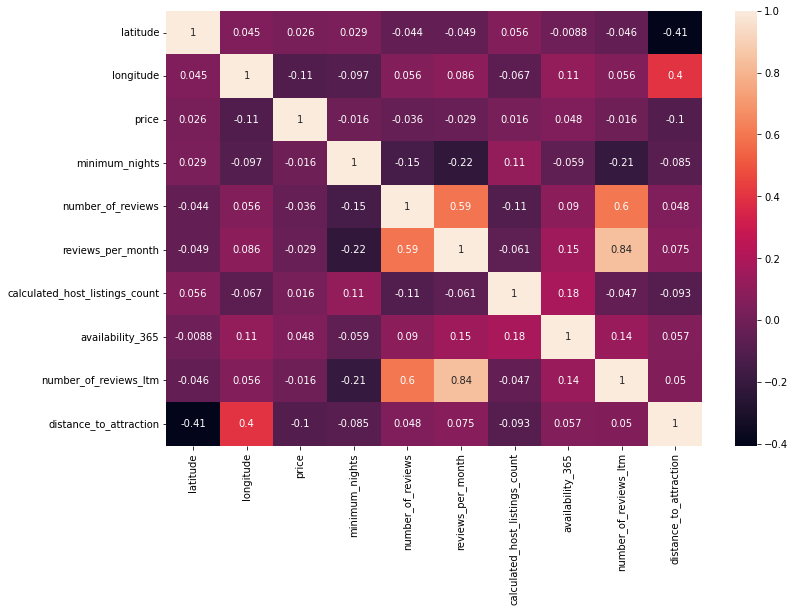

In [5]:
# correlation matrix
sns.heatmap(df.corr(), annot = True)

In [6]:
df['host_id'].describe()

count         37631
unique        24825
top       107434423
freq            332
Name: host_id, dtype: object

In [7]:
# host id 107434423 (Blueground) has highest number of listings
df[df['host_id'] == '107434423'].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,month,listing_coordinates,attraction_location,attraction_coordinates,distance_to_attraction
12697,20845031,"Homey Midtown East 1BR w/ Gym, Doorman, near t...",107434423,Blueground,Manhattan,Kips Bay,40.745724,-73.979858,Entire home/apt,403,...,0.00,332,219,0,NaN,NaN,"(40.745724, -73.979858)",Central Park,"(40.769361, -73.977655)",1.64
14260,23264421,"Mod Midtown East 1BR w/ Gym, walk to Grand Cen...",107434423,Blueground,Manhattan,Murray Hill,40.748405,-73.979866,Entire home/apt,428,...,0.00,332,359,0,NaN,NaN,"(40.748405, -73.979866)",Central Park,"(40.769361, -73.977655)",1.45
14370,23538486,"Posh Park Avenue 1BR w/ Gym, Doorman in Midtow...",107434423,Blueground,Manhattan,Murray Hill,40.748405,-73.979866,Entire home/apt,408,...,0.03,332,260,0,NaN,January,"(40.748405, -73.979866)",Central Park,"(40.769361, -73.977655)",1.45
14758,24535218,"Luxury Tribeca 1BR w/ Gym, Doorman + Roof deck...",107434423,Blueground,Manhattan,Tribeca,40.713833,-74.010239,Entire home/apt,445,...,0.11,332,365,1,NaN,May,"(40.713833, -74.010239)",Central Park,"(40.769361, -73.977655)",4.20
14954,24960138,"Bright, Winged Tribeca Studio w/ Indoor pool, ...",107434423,Blueground,Manhattan,Tribeca,40.715794,-74.005875,Entire home/apt,375,...,0.00,332,363,0,NaN,NaN,"(40.715794, -74.005875)",Central Park,"(40.769361, -73.977655)",3.99


In [8]:
df['neighbourhood'].describe()

count                  37631
unique                   223
top       Bedford-Stuyvesant
freq                    2825
Name: neighbourhood, dtype: object

In [9]:
# 223 unique neighborhoods
# Bedford-Stuyvesant has the most listings

In [10]:
# top ten neighbourhoods with most listings
df['neighbourhood'].value_counts().head(10)

Bedford-Stuyvesant    2825
Williamsburg          2399
Harlem                1847
Hell's Kitchen        1709
Bushwick              1660
Midtown               1613
Upper West Side       1426
Upper East Side       1288
Crown Heights         1194
East Village          1051
Name: neighbourhood, dtype: int64

In [11]:
# number of listings in top ten
df['neighbourhood'].value_counts().head(10).sum()

17012

In [12]:
round((17012/37631)*100, 2)
# top 10 neighbourhoods represent 45.21% of all listings

45.21

In [13]:
# unique neighbourhoods
df['neighbourhood_group'].describe()
# five neighbourhoods groups with Manhattan having the most listings at 16086

count         37631
unique            5
top       Manhattan
freq          16086
Name: neighbourhood_group, dtype: object

In [14]:
# number of rooms of each type
df['room_type'].value_counts()

Entire home/apt    20362
Private room       16500
Shared room          571
Hotel room           198
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Number of Rooms of Each Type')

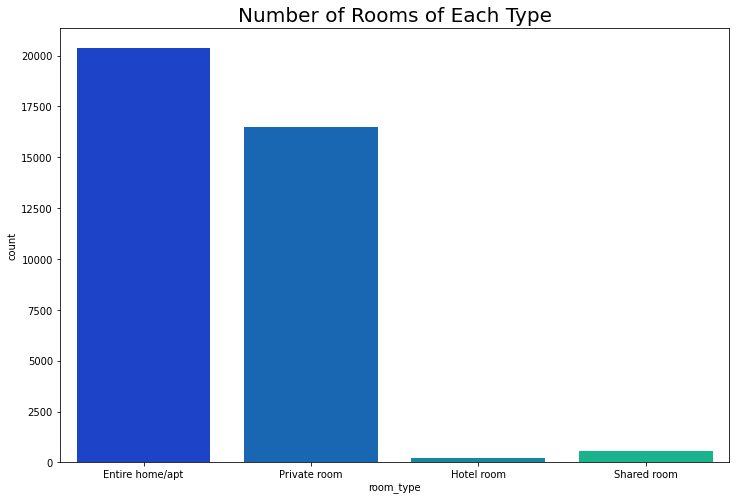

In [15]:
sns.countplot(x = 'room_type', data = df, palette = 'winter')
plt.title("Number of Rooms of Each Type", fontsize = 20)

Text(0.5, 1.0, 'Listings Each Month')

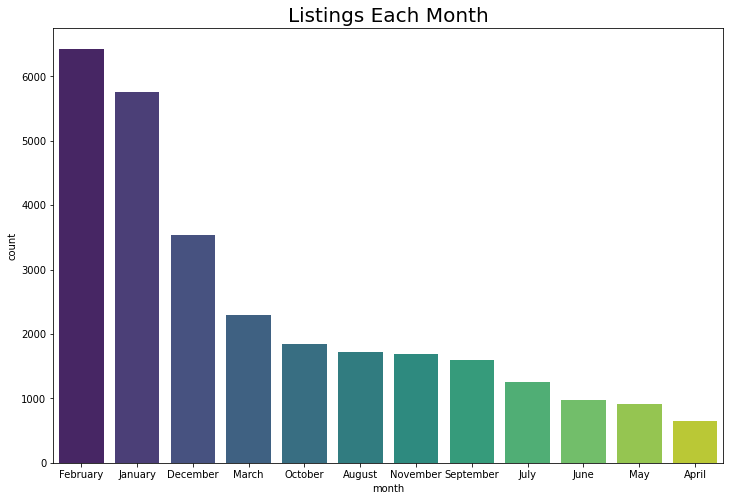

In [16]:
sns.countplot(x = 'month', data = df, order = df['month'].value_counts().index, palette = 'viridis')
plt.title('Listings Each Month', fontsize = 20)

In [ ]:
# The majority of reviews are left in February which means a majority of customers were using rentals in February
# Likewise, the smallest amount of reviews were left in April which means fewer customers were using rentals in  April

In [17]:
df['availability_365'].mean()
# On average, any given listing is available 129 days in a year

129.08567404533497

In [18]:
n_group = df.groupby('neighbourhood_group')['availability_365'].mean().round(2)
n_group = n_group.to_frame()
n_group.rename(columns = {'availability_365':'average_availability'}, inplace = True)
n_group

,average_availability
neighbourhood_group,
Bronx,188.28
Brooklyn,116.05
Manhattan,125.74
Queens,155.28
Staten Island,195.15


In [19]:
n_group['average_price'] = df.groupby('neighbourhood_group')['price'].mean().round()
n_group['average_number_of_reviews_per_listing'] = df.groupby('neighbourhood_group')['number_of_reviews'].mean().round()
n_group['total_number_of_reviews'] = df.groupby('neighbourhood_group')['number_of_reviews'].sum().round(2)
n_group.sort_values(by = ['average_availability'])

,average_availability,average_price,average_number_of_reviews_per_listing,total_number_of_reviews
neighbourhood_group,,,,
Brooklyn,116.05,135.0,27.0,391103
Manhattan,125.74,218.0,20.0,326083
Queens,155.28,114.0,29.0,164626
Bronx,188.28,105.0,28.0,33383
Staten Island,195.15,122.0,39.0,12900


In [20]:
# Listings in Staten Island have the highest average availability and the highest average number of reviews per listing
    # However, they also have the lowest total number of reviews
# Listings in the Bronx have the second highest average availability and the lowest average price
    # They have the second lowest total number of reviews
# Listings in Manhattan have the second lowest average availability, highest average price, and second highest total number of reviews
    # However, they have the lowest average number of reviews per listing
# Brooklyn has the lowest average availability and second highest average price
    # They also have the highest total number of reviews

In [21]:
df['minimum_nights'].mean()
# average duration of stay for ALL listings is 20 days

20.49663840982169

In [22]:
df.groupby('neighbourhood')['minimum_nights'].mean().sort_values()
# Listings in Castle Hill offer the longest average duration of stay at 122 days

neighbourhood
Woodrow               1.000000
South Beach           1.000000
Douglaston            1.375000
Huguenot              1.500000
Van Nest              1.642857
                       ...    
Spuyten Duyvil       47.666667
Grant City           55.266667
Brooklyn Heights    100.185185
Rossville           105.000000
Castle Hill         122.333333
Name: minimum_nights, Length: 223, dtype: float64

In [23]:
df.groupby('neighbourhood_group')['minimum_nights'].mean().sort_values()
# Listings in the Manhattan neighbourhood group offered the longest average duration of stay
# at 22 days

neighbourhood_group
Bronx            12.990856
Staten Island    13.671642
Queens           16.602305
Brooklyn         20.302568
Manhattan        22.738841
Name: minimum_nights, dtype: float64

In [24]:
df['distance_to_attraction'].mean()
# On average, any given listing is 3.16 miles from the closest major attraction

3.1566269830724663

In [25]:
n_group = df.groupby('neighbourhood_group')['distance_to_attraction'].mean().round(2)
n_group = n_group.to_frame()
n_group.rename(columns = {'distance_to_attraction' : 'average_distance_to_major_attraction'}, inplace = True)
n_group

,average_distance_to_major_attraction
neighbourhood_group,
Bronx,2.43
Brooklyn,3.56
Manhattan,2.45
Queens,4.31
Staten Island,3.00


In [26]:
n_group['average_price'] = df.groupby('neighbourhood_group')['price'].mean().round()
n_group['average_number_of_reviews_per_listing'] = df.groupby('neighbourhood_group')['number_of_reviews'].mean().round()
n_group['total_number_of_reviews'] = df.groupby('neighbourhood_group')['number_of_reviews'].sum().round(2)
n_group.sort_values(by = ['average_distance_to_major_attraction'])

,average_distance_to_major_attraction,average_price,average_number_of_reviews_per_listing,total_number_of_reviews
neighbourhood_group,,,,
Bronx,2.43,105.0,28.0,33383
Manhattan,2.45,218.0,20.0,326083
Staten Island,3.00,122.0,39.0,12900
Brooklyn,3.56,135.0,27.0,391103
Queens,4.31,114.0,29.0,164626


In [27]:
# Listings in the Bronx have the lowest average distance to the major attraction and the lowest average prices
# Listings in Manhattan have the second lowest average distance to major attraction, but have the highest average price
# Listings in Queens have the highest average distance to major attraction

In [28]:
avg_price = round(df['price'].mean(), 2)
avg_price
# The average price across all listings is $166.22 per night

166.22

Text(0.5, 1.0, 'Reviews per Month vs Price')

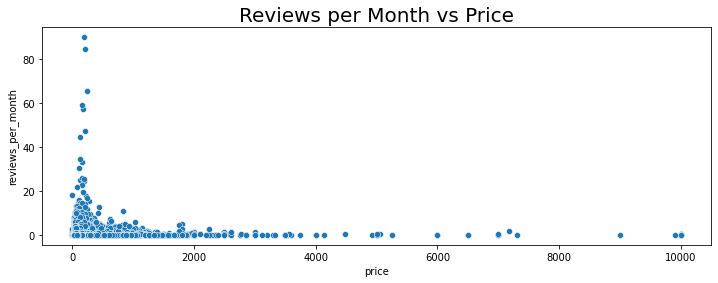

In [29]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize = fig_dims)

sns.scatterplot(y = 'reviews_per_month', x = 'price', data = df)
plt.title("Reviews per Month vs Price", fontsize = 20)

Text(0.5, 1.0, 'Number of Reviews vs Price')

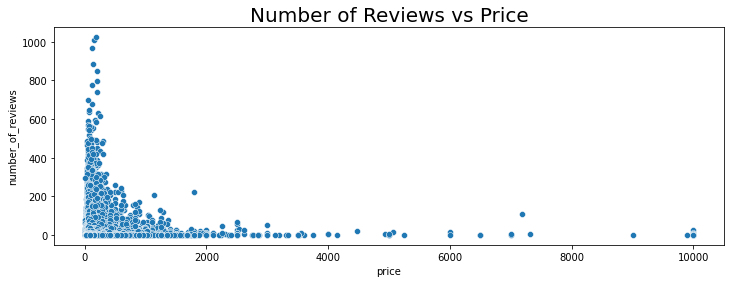

In [30]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize = fig_dims)

sns.scatterplot(y = 'number_of_reviews', x = 'price', data = df)
plt.title("Number of Reviews vs Price", fontsize = 20)

In [31]:
nbhd = df.groupby('neighbourhood')['price'].mean().round(2)
nbhd = nbhd.to_frame()
nbhd.rename(columns = {'price':'average_price'}, inplace = True)
nbhd['average_number_of_reviews'] = df.groupby('neighbourhood')['number_of_reviews'].mean().round()
nbhd.head()

,average_price,average_number_of_reviews
neighbourhood,,
Allerton,99.90,62.0
Arden Heights,117.33,33.0
Arrochar,144.62,45.0
Arverne,197.95,34.0
Astoria,97.63,29.0


Text(0.5, 1.0, 'Number of Reviews vs Price: Aggregated by Neighbourhood')

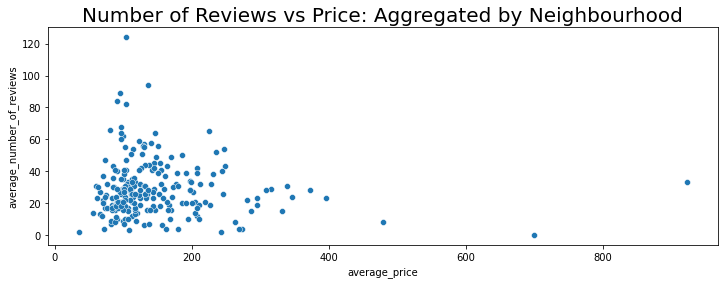

In [32]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize = fig_dims)

sns.scatterplot(y = 'average_number_of_reviews', x = 'average_price', data = nbhd)
plt.title("Number of Reviews vs Price: Aggregated by Neighbourhood", fontsize = 20)

In [33]:
# Neighbourhoods with listings above average price
nbhd[nbhd['average_price'] > avg_price].count()
# There are 58 neighbourhoods with average listing price above the average for all listings

average_price                58
average_number_of_reviews    58
dtype: int64

In [34]:
# Neighbourhoods with listings below average price
nbhd[nbhd['average_price'] < avg_price].count()
# There are 165 neighbourhoods with average listing price below the average for all listings

average_price                165
average_number_of_reviews    165
dtype: int64

In [35]:
df.groupby('neighbourhood_group')['price'].std()
# Largest standard deviation in price in Manhattan neighbourhood group

neighbourhood_group
Bronx            122.036773
Brooklyn         173.608221
Manhattan        403.785989
Queens           261.066562
Staten Island    122.468351
Name: price, dtype: float64

Text(0.5, 1.0, 'Listing Price by Neighbourhood Group')

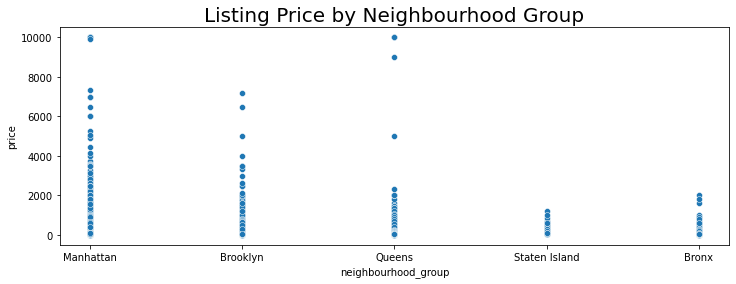

In [36]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize = fig_dims)

sns.scatterplot(y = 'price', x = 'neighbourhood_group', data = df)
plt.title("Listing Price by Neighbourhood Group", fontsize = 20)
# Spread of prices greatest in Manhattan

In [37]:
n_group = df.groupby('neighbourhood_group')['price'].mean().round(2)
n_group = n_group.to_frame()
n_group.rename(columns = {'price':'average_price'}, inplace = True)
n_group

,average_price
neighbourhood_group,
Bronx,104.95
Brooklyn,134.87
Manhattan,218.19
Queens,113.59
Staten Island,121.88


In [38]:
n_group['total_number_of_reviews'] = df.groupby('neighbourhood_group')['number_of_reviews'].sum().round(2)
n_group['number_of_listings'] = df['neighbourhood_group'].value_counts()
n_group['ratio'] = (n_group['total_number_of_reviews']/n_group['number_of_listings']).round(2)
n_group

,average_price,total_number_of_reviews,number_of_listings,ratio
neighbourhood_group,,,,
Bronx,104.95,33383,1203,27.75
Brooklyn,134.87,391103,14367,27.22
Manhattan,218.19,326083,16086,20.27
Queens,113.59,164626,5640,29.19
Staten Island,121.88,12900,335,38.51


In [39]:
# The ratio of reviews to number of listings is greatest with Staten Island
    # Reviews were left more frequently for stays in listings in the Staten Island neighbourhood group
# The Manhattan neighbourhood group has the second highest total number of reviews
    # However, the ratio of reviews to listings is the lowest indicating that reviews are left less frequently

In [40]:
room_type = df.groupby('room_type')['price'].mean().round(2)
room_type = room_type.to_frame()
room_type.rename(columns = {'price':'average_price'}, inplace = True)
room_type

,average_price
room_type,
Entire home/apt,216.92
Hotel room,274.81
Private room,103.09
Shared room,145.20


In [41]:
room_type['total_number_of_reviews'] = df.groupby('room_type')['number_of_reviews'].sum().round()
room_type

,average_price,total_number_of_reviews
room_type,,
Entire home/apt,216.92,524813
Hotel room,274.81,10465
Private room,103.09,381648
Shared room,145.20,11169


Text(0.5, 0.98, 'Number of Reviews vs Price for Each Room Type')

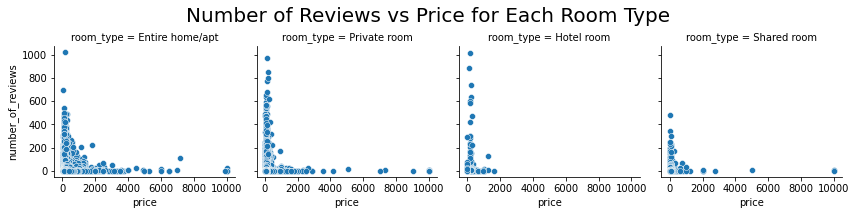

In [42]:
graph = sns.FacetGrid(df, col = 'room_type')
graph.map(sns.scatterplot, 'price', 'number_of_reviews')

graph.fig.subplots_adjust(top = 0.8)
graph.fig.suptitle('Number of Reviews vs Price for Each Room Type', fontsize = 20)

In [ ]:
# Summary

In [ ]:
# Availability
    # There are 37631 total listings
    # The majority of the listings are either Entire home/apts or Private Rooms
    # On average, any given listing is available 129 days in a year
        # Listings in Staten Island have the highest average availability and the highest average number of reviews per listing
            # However, they also have the lowest total number of reviews
        # Listings in the Bronx have the second highest average availability and the lowest average price
            # They have the second lowest total number of reviews
        # Listings in Manhattan have the second lowest average availability, highest average price, and second highest total number of reviews
            # However, they have the lowest average number of reviews per listing
        # Brooklyn has the lowest average availability and second highest average price
            # They also have the highest total number of reviews

In [ ]:
# Location
    # There are 223 unique neighborhoods with Bedford-Stuyvesant having the most listings
    # The top 10 neighbourhoods represent 45.21% of all listings
    # There are five neighbourhoods groups with Manhattan having the most listings at 16086
    # On average, any given listing is 3.16 miles from the closest major attraction
        # Listings in the Bronx have the lowest average distance to the major attraction and the lowest average prices
        # Listings in Manhattan have the second lowest average distance to major attraction, but have the highest average price
        # Listings in Queens have the highest average distance to major attraction

In [ ]:
# Price
    # The average price across all listings is $166.22 per night
    # There are 58 neighbourhoods with average listing price above the average for all listings
    # There are 165 neighbourhoods with average listing price below the average for all listings
    # Spread of prices is greatest in Manhattan and largest standard deviation in price is in Manhattan
    # On average, "Hotel room" room type is the most expensive

In [ ]:
# Number of Reviews
    # Across all categorires(Room Type, Neighbourhood, etc) less expensive listings receive more reviews
    # The majority of reviews are left in February which means a majority of customers were using rentals in February
    # Likewise, the smallest amount of reviews were left in April which means fewer customers were using rentals in  April
    # The ratio of reviews to number of listings is greatest with Staten Island
        # Reviews were left more frequently for stays in listings in the Staten Island neighbourhood group
    # The Manhattan neighbourhood group has the second highest total number of reviews
        # However, the ratio of reviews to listings is the lowest indicating that reviews are left less frequently

In [ ]:
df.to_csv(r"C:\Users\Kevin Jiang\Documents\GitHub\newyork_airbnb\dataframe2.csv", index = False, header = True)